# Table of Contents

1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
3. [Sentiment Analysis](#sentiment-analysis)
4. [Trend Visualization](#trend-visualization)
5. [Report Generation](#report-generation)


# Introduction :

Social media sentiment analysis involves extracting opinions from text data to categorize them into sentiments such as positive,negative and neutral.This helps in understanding public opinion about various topics,products,or services.
  

# Data Preparation :

**Objective** : Prepare social media sentiment data for analysis.

- **Load the Data** : Import data from a csv file.
- **Check for Missing Values** : Identify and handle missing values.
- **Convert Dates** : Ensure the date columns is in datetime format.
- **Set Index** : Set the date column as the index.
- **Clean Text Data** : Preprocess text data for sentiment analysis.

In [1]:
import pandas as pd

# Load the dataset
data = r"https://raw.githubusercontent.com/EdulaneDotCo/kaggle/main/data/social_media_sentimate_data.csv"
df_sentiments = pd.read_csv(data)

# Print the first few rows to verify the column names
print(df_sentiments.head())

# Check for missing values
print(df_sentiments.isnull().sum())

# Drop rows with missing values in 'New_Date' and 'clean_tweet' columns
df_sentiments.dropna(subset=['New_Date', 'clean_tweet'], inplace=True)

# Convert 'New_Date' column to datetime
df_sentiments['New_Date'] = pd.to_datetime(df_sentiments['New_Date'])

# Set 'New_Date' as the index
df_sentiments.set_index('New_Date', inplace=True)

# Display the prepared data
print(df_sentiments.head())


                        Date  \
0  2023-04-08 03:31:08+00:00   
1  2023-04-08 03:30:51+00:00   
2  2023-04-08 03:30:00+00:00   
3  2023-04-08 03:28:59+00:00   
4  2023-04-08 03:28:31+00:00   

                                               Tweet  \
0  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
1  "Classical art" is struggling - not changed th...   
2  Alibaba invites businesses to trial 'ChatGPT r...   
3  Trying to stop students from using #AI and #ch...   
4  I Asked ChatGPT's AI Chatbot How Can I Earn Cr...   

                                                 Url            User  \
0  https://twitter.com/tubeblogger/status/1644543...     tubeblogger   
1  https://twitter.com/majorradic/status/16445432...      majorradic   
2  https://twitter.com/gadgetsnow/status/16445430...      gadgetsnow   
3  https://twitter.com/Sherab_Taye/status/1644542...     Sherab_Taye   
4  https://twitter.com/cryptoccentral/status/1644...  cryptoccentral   

                 UserCreated  UserVer

**Explanation** :

- **Load the Data** : We use `pd.read_csv` to load the sentiment data from a csv file.
- **Check for Missing Values** : We use `df_sentiments.isnull().sum()` to identify the missing values and drop rows with missing value in the `New_Date` and `clean_tweet` columns using `dropna`.
- **Convert Dates** : We ensure the `New_Date` column is in datetime format using `pd.to_datetime`.
- **Set Index** : We set the 'New_Date` column as the index using `df_sentiments.set_index`.

# Sentiment Analysis

**Objective** : Perform sentiment analysis to categorize sentiments into positive,negative and neutral.

- **Install and import Required Libraries** : Install `nltk` and import necessary libraries.
- **Load Sentiment Analyzer** : Use `nltk` VADER(Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer.
- **Analyze Sentimets** : Calculate sentiments scores and categorize them.



In [2]:
#Install NLTK if not already installed
!pip install nltk

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Download vader_lexicon
nltk.download('vader_lexicon')

#load Vader sentiment analyzer
sid=SentimentIntensityAnalyzer()

#calculate the sentiment scores for each tweet
df_sentiments['sentiment_scores']=df_sentiments['clean_tweet'].apply(lambda tweet:sid.polarity_scores(tweet))

#extract compound score
df_sentiments['compound_score']=df_sentiments['sentiment_scores'].apply(lambda score_dict:score_dict['compound'])

#categorize sentiments based on compound scores
df_sentiments['sentiment']=df_sentiments['compound_score'].apply(lambda score:'positive' if score>=0.05 else('negative' if score<=-0.05 else 'neutral'))

#display the sentiment analysis result
print(df_sentiments[['clean_tweet','compound_score','sentiment']].head())

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                                  clean_tweet  compound_score  \
New_Date                                                                        
2023-04-08               openai’s gpt4 just got supercharged!          0.0000   
2023-04-08  classical art" is struggling  not changed the ...         -0.2500   
2023-04-08  alibaba invites businesses to trial chatgpt ri...          0.0000   
2023-04-08  trying to stop students from using and is like...         -0.2263   
2023-04-08  i asked chatgpts ai chatbot how can i earn cry...          0.0000   

           sentiment  
New_Date              
2023-04-08   neutral  
2023-04-08  negative  
2023-04-08   neutral  
2023-04-08  negative  
2023-04-08   neutral  


**Explanation** :

- **Install and Import required Libraries** : We use `nltk` for sentiment analyzer.
- **Load Sentiment Analyzer** : We load the VADER sentiment analyzer using `SentimentIntensityAnalyzer`.
- **Analyze Sentiments** : We calculates sentiment scores for each tweet,extract the compound score and categorize the sentiments into positive negative or neutral

# Trend Visualization 

**Objective** : Visualize sentiment trend over time.

- **Resample Data** : Aggregate sentiment counts on a daily basis.
- **Plot Sentiment Trends** : Visualize the trend of positive,negative and neutral sentiments over time.

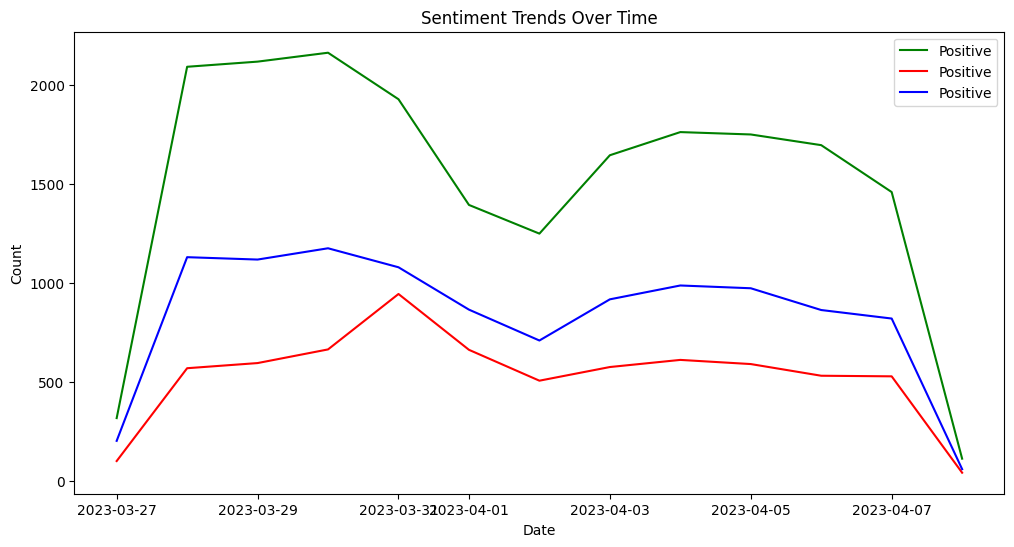

In [4]:
import matplotlib.pyplot as plt
#resample data to daily sentiment counts
#initialize an empty dataframe to store daily sentiment counts
df_daily_sentiments = pd.DataFrame(index=pd.date_range(start=df_sentiments.index.min(), end=df_sentiments.index.max()))
# Aggregate sentiment counts by day
df_daily_sentiments['positive']=df_sentiments[df_sentiments['sentiment']=='positive'].resample('D').size()
df_daily_sentiments['negative']=df_sentiments[df_sentiments['sentiment']=='negative'].resample('D').size()
df_daily_sentiments['neutral']=df_sentiments[df_sentiments['sentiment']=='neutral'].resample('D').size()

#Fill Nan values with 0 to represent  days with no sentiments
df_daily_sentiments.fillna(0,inplace=True)

#plot sentiments trends
plt.figure(figsize=(12,6))
plt.plot(df_daily_sentiments.index,df_daily_sentiments['positive'],label='Positive',color='g')
plt.plot(df_daily_sentiments.index,df_daily_sentiments['negative'],label='Positive',color='r')
plt.plot(df_daily_sentiments.index,df_daily_sentiments['neutral'],label='Positive',color='b')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**Explanation**:

- **Resample Data** : We resample the sentiments data to aggregate counts on a daily basis using `resample` and `size` for each sentimencategory(positive,negative,neutral).We initialize an empty Dataframe `df_daily_sentiments` with a date range from the minimum to the maximum date in the datset to ensure all dates are represented.
- **Fill Nan Values** : We fill any `NaN` values with 0 to represents day with no sentiments.
- **Plot Sentiment Trends** : We use `matplotlib` to plot the trends of positive,negative and neutral sentiments over time.

# Report Generation

**Objective** : Generates reports to summarize insights from the sentiment analysis.

- **Summarize Data** : Create summary statistics of sentiments.
- **Generates plots** : Save plots of sentiment trends.
- **Export to CSV** : Export the summarized data to a csv file.

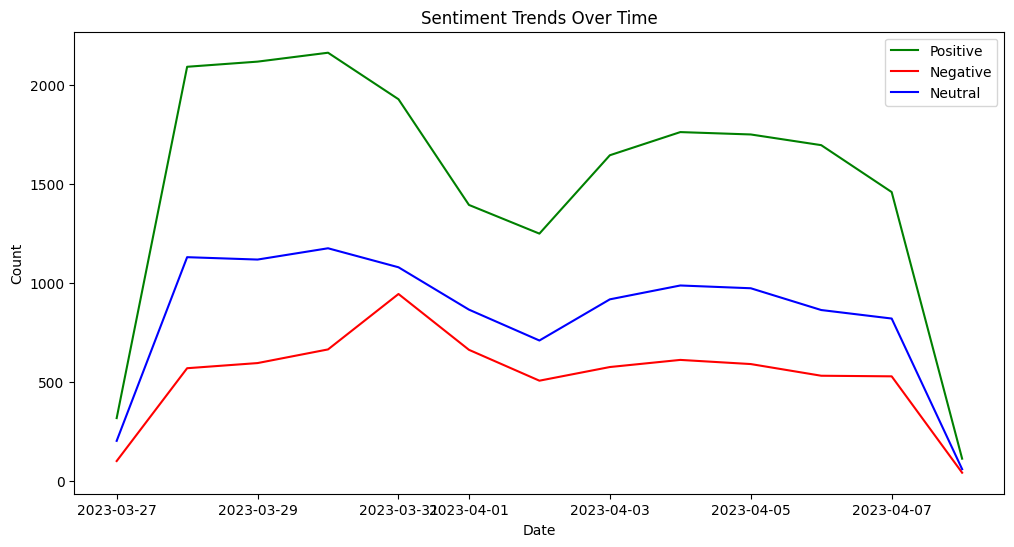

Report generated: 'sentiment_summary.csv' and 'sentiment_trends.png'


In [5]:
#summarize data
sentiment_summary=df_daily_sentiments.describe()

#generate plots and save them
plt.figure(figsize=(12,6))
plt.plot(df_daily_sentiments.index, df_daily_sentiments['positive'], label='Positive', color='g')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['negative'], label='Negative', color='r')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['neutral'], label='Neutral', color='b')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.savefig('sentiment_trends.png')
plt.show()

# Export summarized data to CSV
sentiment_summary.to_csv('sentiment_summary.csv')

print("Report generated: 'sentiment_summary.csv' and 'sentiment_trends.png'")
